In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import pandas as pd
import numpy as np
from IPython.display import *

import AssembleData

In [3]:

# Build Dataframe 
# MAL_df, all_genre  = AssembleData.read_files_all()
# MAL_df = MAL_df.drop_duplicates('id')

In [4]:
import pickle

# MAL_df = MAL_df.drop_duplicates('id')
# with open('1998_2015_data.pkl', 'w') as f:
#     pickle.dump(MAL_df, f)
#     pickle.dump(all_genre, f)

with open('1998_2015_data.pkl', 'r') as f:
    MAL_df = pickle.load(f)
    all_genre = pickle.load(f)

In [5]:
def only_genre(g):
    return MAL_df[MAL_df[g] == 1]

least squares on random train/test,  0.223369699627
least squares on self:  0.241205728581
kids :  -0.378522581534
yuri :  -0.256123586538
ecchi :  -0.186238014554
yaoi :  -0.180544513078
cars :  -0.175870383388
horror :  -0.134969835532
vampire :  -0.0896301957433
mecha :  -0.0665556257849
martial arts :  -0.00176251715337
no genres have been added yet. :  0.0
game :  0.00288026995205
dementia :  0.013221234607
shoujo ai :  0.0161512214924
harem :  0.0476782073391
magic :  0.0651783595299
demons :  0.070850709366
music :  0.0927925923264
sci-fi :  0.0949532389667
comedy :  0.109909696269
parody :  0.130629084227
space :  0.143091165597
samurai :  0.147190034242
adventure :  0.148096128425
super power :  0.171777396537
historical :  0.173554627362
fantasy :  0.175593099404
police :  0.195452711776
shounen ai :  0.207001267958
shoujo :  0.214037262066
supernatural :  0.219491406116
slice of life :  0.224674492352
action :  0.229620341806
romance :  0.247767273674
school :  0.27225306765

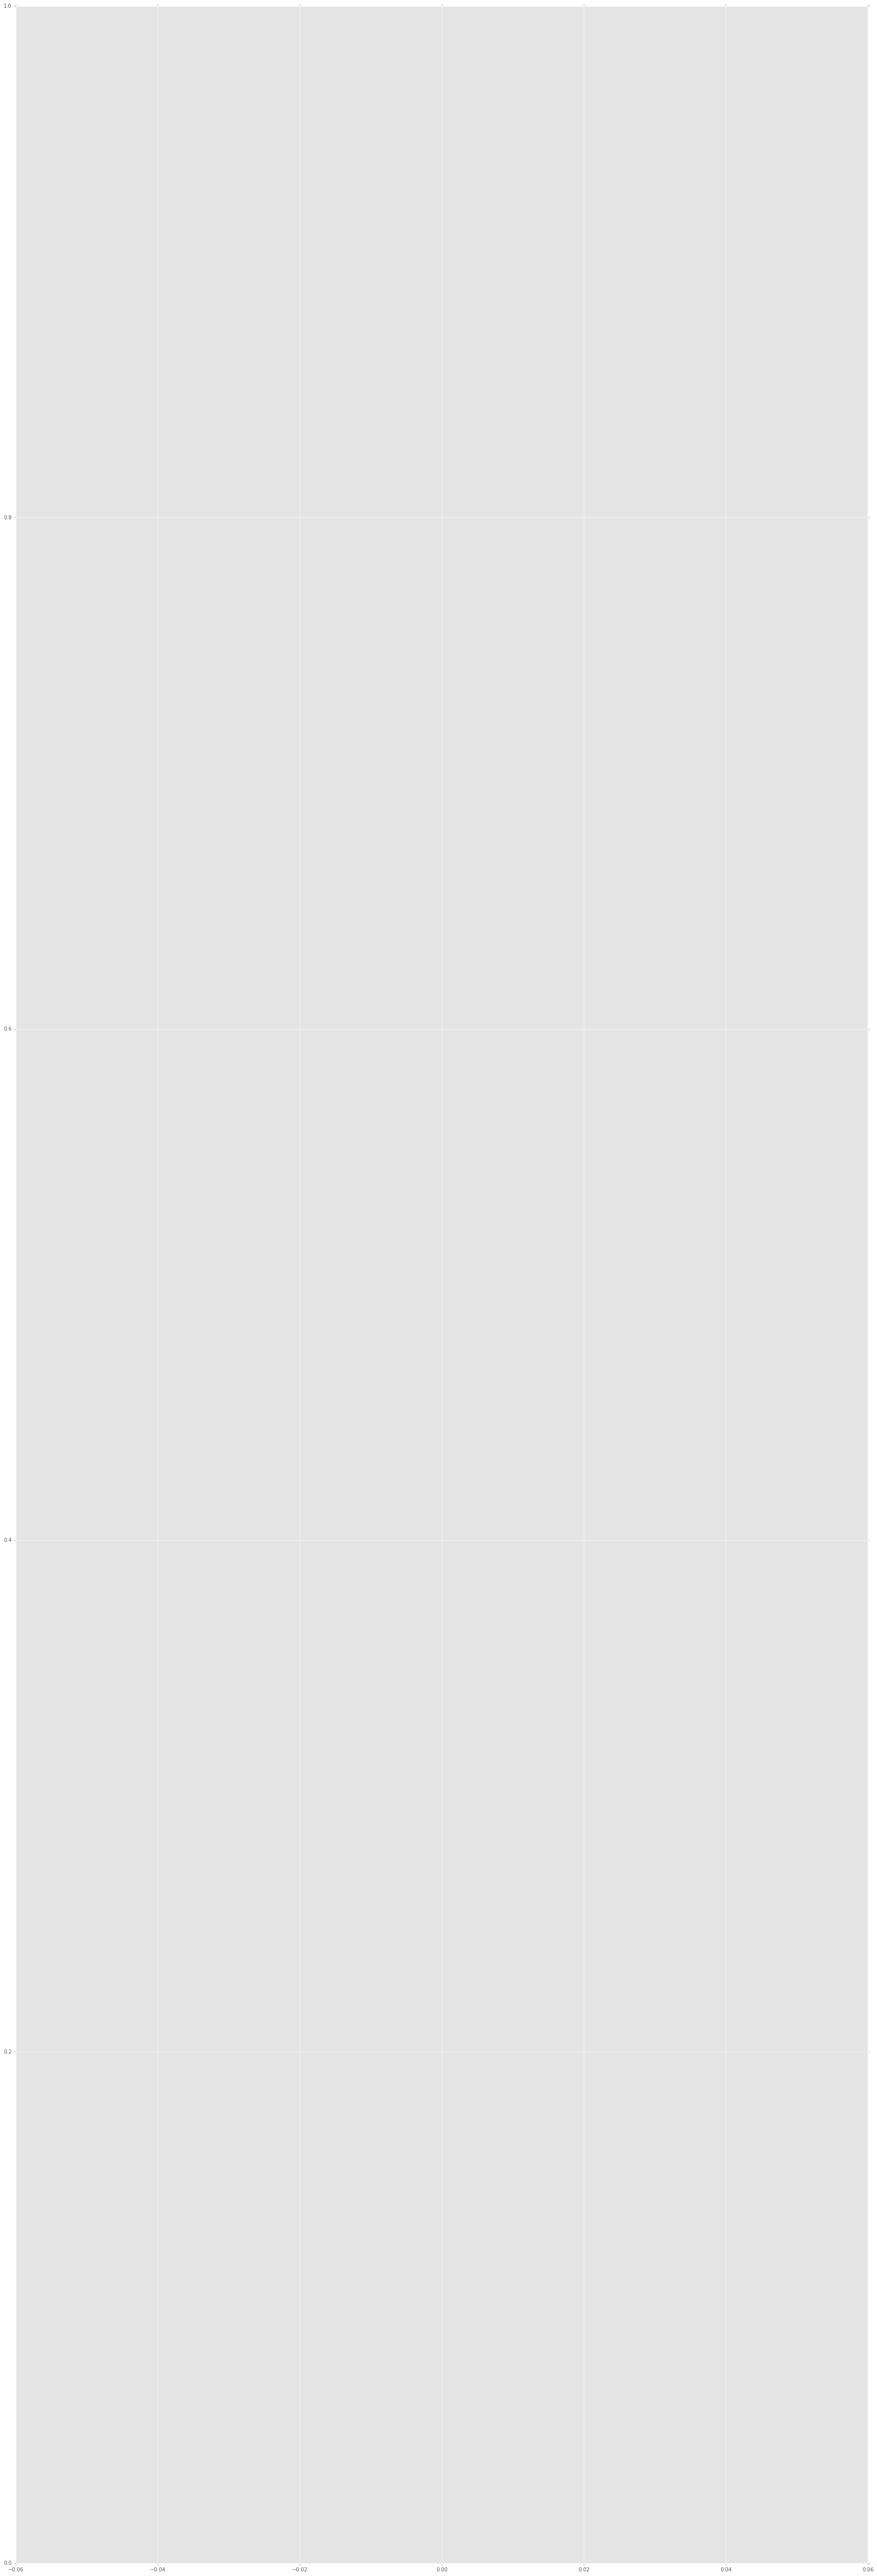

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30.0, 90.0)
plt.figure(1)
plt.gca().set_xscale("linear")

from sklearn import linear_model

X = MAL_df[all_genre]
y = MAL_df["score"]

from random import shuffle
indices = list(range(len(MAL_df)))
shuffle(indices)

X_train = X.iloc[indices[:len(X)/2]]
y_train = y.iloc[indices[:len(X)/2]]
X_test = X.iloc[indices[len(X)/2:]]
y_test = y.iloc[indices[len(X)/2:]]

reg = linear_model.LinearRegression()
reg.fit (X_train, y_train)
print "least squares on random train/test, ", reg.score(X_test, y_test)

reg = linear_model.LinearRegression()
reg.fit (X, y)
print "least squares on self: ", reg.score(X, y)


pair = zip(reg.coef_, all_genre)
pair = sorted(pair)

for p in pair:
    print p[1], ": ", p[0]


least squares on random train/test,  0.144755707905
least squares on self:  0.178110913192
kids :  -17159.5548323
shoujo ai :  -15734.5173115
cars :  -14950.1844445
shounen ai :  -14779.5353263
dementia :  -14553.5319482
martial arts :  -12373.3228966
mecha :  -10634.4979016
space :  -9078.68780129
police :  -8576.37590003
yaoi :  -8183.55650305
yuri :  -7241.95786388
historical :  -5530.03552728
shoujo :  -4954.89582529
samurai :  -1069.19916056
demons :  -192.207981897
ecchi :  -183.93292233
no genres have been added yet. :  0.0
sports :  13.6225030037
magic :  103.42317962
music :  748.187926518
sci-fi :  3620.47350525
adventure :  4136.67162843
comedy :  5088.14750122
horror :  5442.7046263
military :  8312.06726245
shounen :  8408.94692983
parody :  8448.2954626
drama :  9097.91725125
fantasy :  11708.826524
josei :  12153.2813798
seinen :  12551.090373
game :  14092.8497975
slice of life :  16127.3637652
vampire :  16365.8209019
mystery :  18996.3008847
super power :  21099.67764

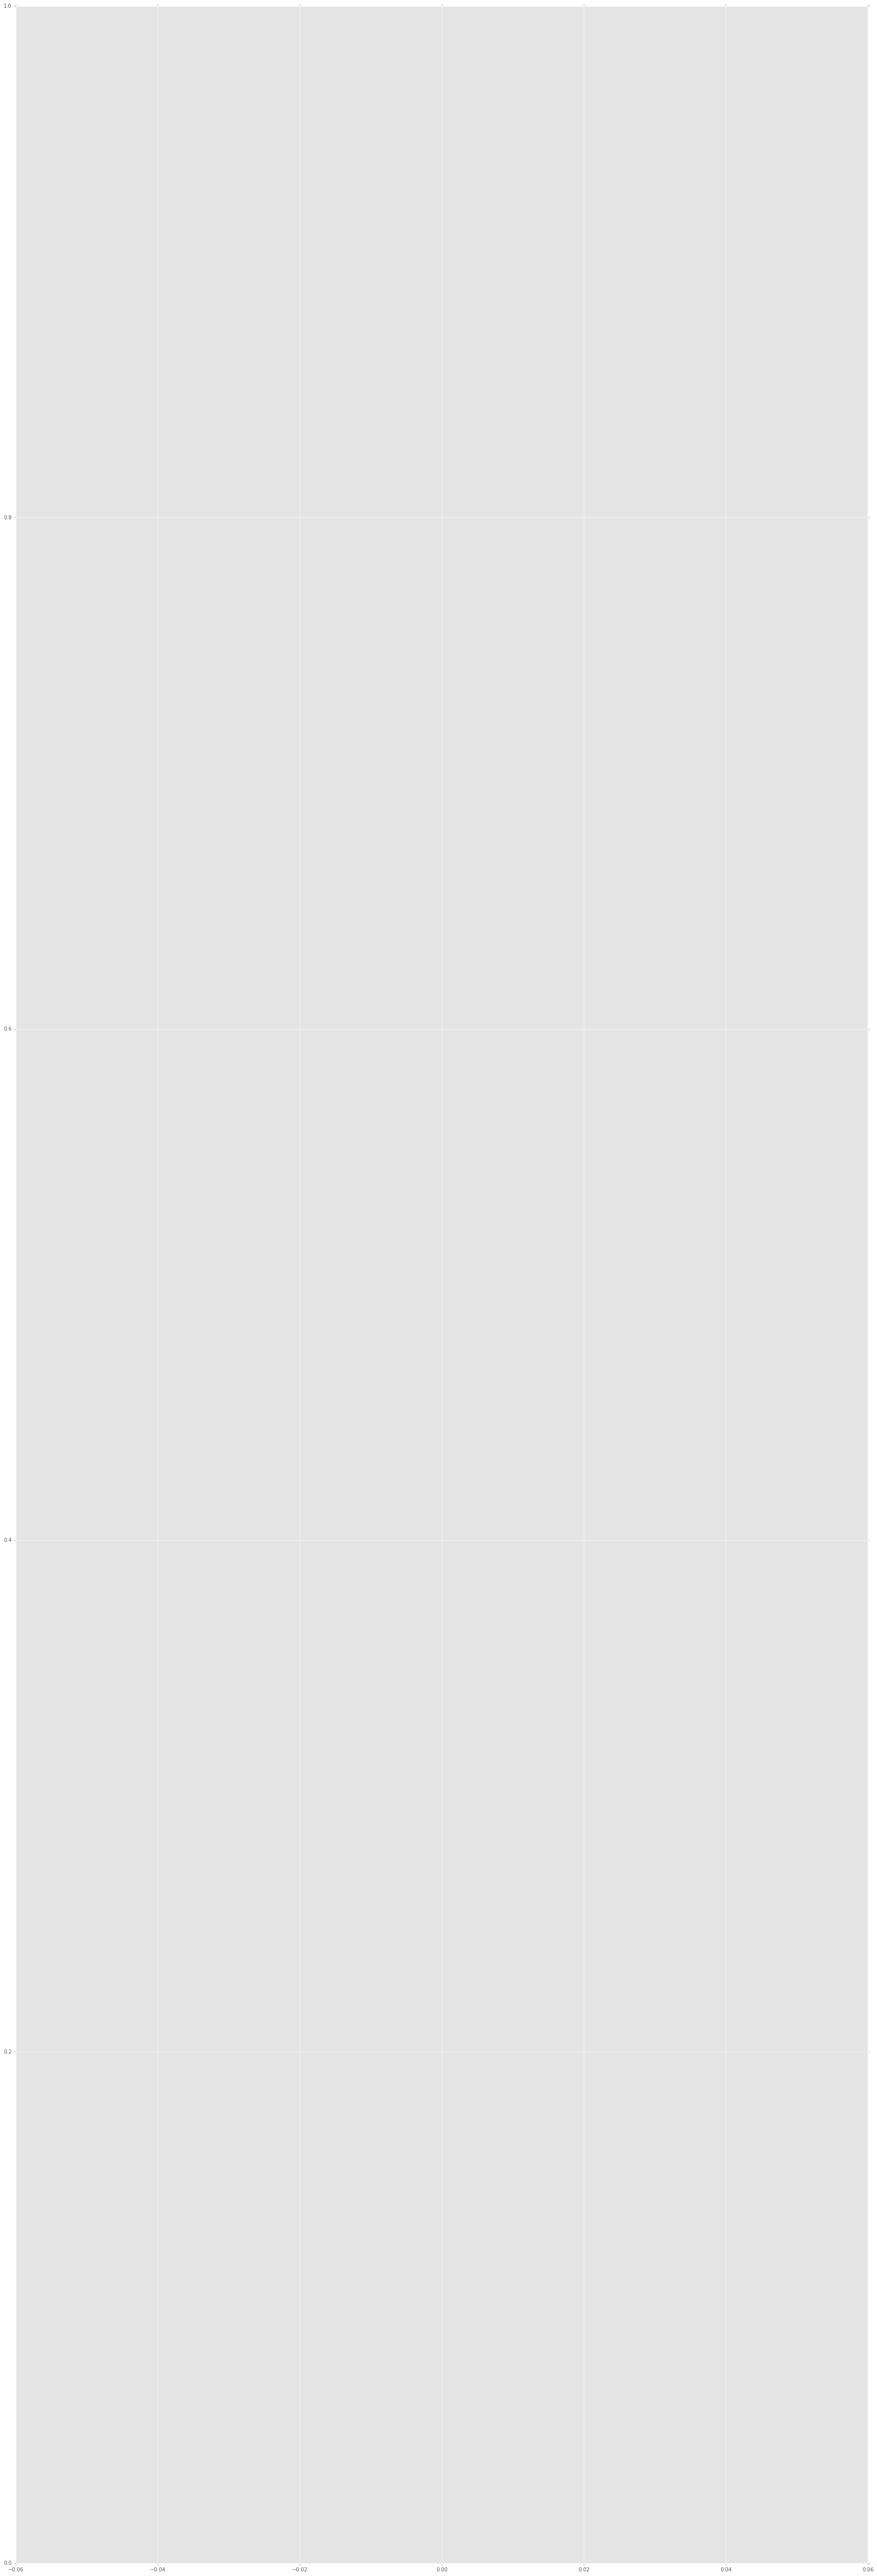

In [45]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30.0, 90.0)
plt.figure(1)
plt.gca().set_xscale("linear")

from sklearn import linear_model

X = MAL_df[all_genre]
y = MAL_df["members"]

from random import shuffle
indices = list(range(len(MAL_df)))
shuffle(indices)

X_train = X.iloc[indices[:len(X)/2]]
y_train = y.iloc[indices[:len(X)/2]]
X_test = X.iloc[indices[len(X)/2:]]
y_test = y.iloc[indices[len(X)/2:]]

reg = linear_model.LinearRegression()
reg.fit (X_train, y_train)
print "least squares on random train/test, ", reg.score(X_test, y_test)

reg = linear_model.LinearRegression()
reg.fit (X, y)
print "least squares on self: ", reg.score(X, y)


pair = zip(reg.coef_, all_genre)
pair = sorted(pair)

for p in pair:
    print p[1], ": ", p[0]

# Shitty Regression Analysis

When using simple linear regression to predict scores and member count from the genre tags, we confirmed some of our initial suspicions and learned a bit more about the demographic of members on MyAnimeList.

The first thing that stuck out were the genres that were negatively correlated with score and member counts. Unsurprisingly, ecchi, yuri, and yaoi shows had a negative correlation, which is to be expected as shows in these genres are more sexually charged, something which is somewhat offputting to the average user. Interestinly, the kids genre was the most negatively correlated with regards to score and popularity. While this initially seems surprising, it is explained by the fact that MyAnimeList users are at the age where they've outgrown those kinds of shows. Coupled with the fact that kids shows tend to be less complex, its negative correlation is unsurprising.

As for positively correlated genres, it wasn't very surprising to find thriller, psycological, romance and action genres in those positions. Something that was surprising was to see that the harem genre was very positively correlated with popularity. 